In [5]:
import pandas as pd
full_data = pd.read_csv("C:/Users/oweni/Desktop/big data/youtube/output/full.csv")

In [6]:
def replace_dollar(num):
    try:
        return float(num.replace("$", "").replace(",", ""))
    except:
        return num

In [7]:
for col in full_data.columns[7:14]:
    full_data[col] = full_data[col].apply(replace_dollar)

In [9]:
##full_data= full_data[full_data.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [10]:
ROI = (full_data["WorldWide Gross"]+full_data["Total Domestic Video Sales"])/full_data["Production Budget"]
full_data["ROI"] = ROI

,movie_title,countComments,countViews,countLikes,countDislikes,ID,Release Date,Production Budget,Domestic Gross,International Gross,WorldWide Gross,Domestic Blu-Ray Sales,Domestic DVD Sales,Total Domestic Video Sales,Genre,MPAA Rating,Movie Studio (Distributor),ROI
0,#Horror,8629,23452637,86772,4387,4697,11/20/2015,1500000.0,0.0,0.0,0.0,NaN,NaN,NaN,Horror,Not,NaN,NaN
1,10 Cloverfield Lane,8148,9923330,32396,1211,3909,3/11/2016,5000000.0,72082999.0,36203423.0,108286422.0,4064827.0,3215156.0,7279983.0,Thriller/Suspense,PG-13,Paramount Pictures,23.113281
2,10 Days in a Madhouse,41,56554,214,24,3177,11/11/2015,12000000.0,14616.0,0.0,14616.0,NaN,NaN,NaN,Drama,R,Cafe Pictures,NaN
3,10th & Wolf,30,97035,140,5,3611,8/18/2006,8000000.0,54702.0,89080.0,143782.0,NaN,NaN,NaN,Drama,Not,inkFilm,NaN
4,12 Rounds,14,69078,79,11,2410,3/27/2009,20000000.0,12234694.0,5071954.0,17306648.0,NaN,9077332.0,9077332.0,Action,PG-13,20th Century Fox,1.319199
5,12 Years a Slave,8892,6673173,15263,900,2300,10/18/2013,20000000.0,56671993.0,124353350.0,181025343.0,7716085.0,16848324.0,24564409.0,Drama,R,Fox Searchlight,10.279488
6,127 Hours,9098,12634126,28113,669,2568,11/5/2010,18000000.0,18335230.0,41881941.0,60217171.0,2781183.0,10680659.0,13461842.0,Drama,R,Fox Searchlight,4.093279
7,1408,601,4030368,6086,291,2195,6/22/2007,22500000.0,71985628.0,59277742.0,131263370.0,NaN,49766172.0,49766172.0,Horror,R,MGM,8.045757
8,16 Blocks,52,366365,438,45,1180,3/3/2006,45000000.0,36895141.0,28700000.0,65595141.0,NaN,20191475.0,20191475.0,Action,PG-13,Warner Bros,1.906369
9,16 to Life,102,142157,411,29,4856,9/3/2010,1000000.0,11574.0,0.0,11574.0,NaN,NaN,NaN,Romantic Comedy,Not,NaN,NaN


In [11]:
full_data = full_data.drop(full_data[full_data.ROI < 0.1].index)

In [12]:
full_data_all = full_data.dropna(subset=["ROI"])

In [13]:
full_data_clean = full_data.dropna(axis=0, how='any')

In [15]:
full_data_all["like_dis"]=full_data_all["countLikes"]/(full_data_all["countLikes"]+full_data_all["countDislikes"])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## descriptive analysis

In [611]:
% matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.style.use('ggplot')
import seaborn

In [590]:
budget_plot = full_data_all[["Release Date", "Production Budget"]]

In [601]:
budget_plot = budget_plot.assign(release_year = (pd.to_datetime(budget_plot["Release Date"])
                                                 .dt.year.astype(int)))
budget_plot = budget_plot[budget_plot['release_year']!=1995]

In [606]:
budget_plot_data = budget_plot.groupby('release_year')['Production Budget'].mean().reset_index()

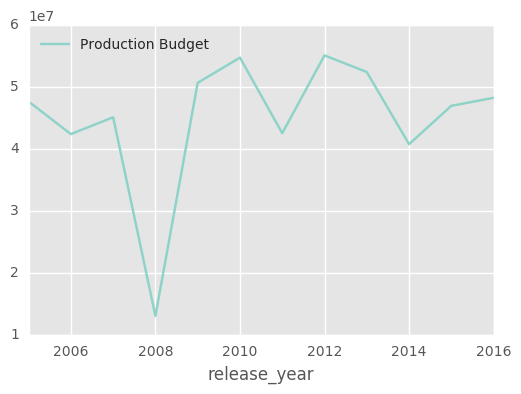

In [629]:
budget_plot_data.plot(x='release_year', y='Production Budget',colormap = "Set3")

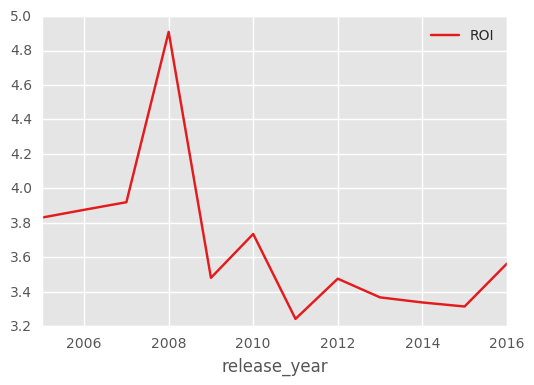

In [636]:
roi_plot = full_data_all[["Release Date", "ROI"]]
roi_plot = roi_plot.assign(release_year = (pd.to_datetime(budget_plot["Release Date"])
                                                 .dt.year.astype(int)))
roi_plot = roi_plot[roi_plot['release_year']!=1995]
roi_plot = roi_plot[roi_plot["ROI"]<roi_plot["ROI"].quantile(0.95)]
roi_plot_data = roi_plot.groupby('release_year')["ROI"].mean().reset_index()
roi_plot_data.plot(x='release_year', y='ROI',colormap = "Set1")

In [660]:
movie_performance = full_data["WorldWide Gross"]+full_data["Total Domestic Video Sales"]
full_data["movie_performance"] = movie_performance

,movie_title,countComments,countViews,countLikes,countDislikes,ID,Release Date,Production Budget,Domestic Gross,International Gross,WorldWide Gross,Domestic Blu-Ray Sales,Domestic DVD Sales,Total Domestic Video Sales,Genre,MPAA Rating,Movie Studio (Distributor),ROI,movie_performance
0,#Horror,8629,23452637,86772,4387,4697,11/20/2015,1500000.0,0.0,0.0,0.0,NaN,NaN,NaN,Horror,Not,NaN,NaN,0.0
1,10 Cloverfield Lane,8148,9923330,32396,1211,3909,3/11/2016,5000000.0,72082999.0,36203423.0,108286422.0,4064827.0,3215156.0,7279983.0,Thriller/Suspense,PG-13,Paramount Pictures,23.113281,108286422.0
2,10 Days in a Madhouse,41,56554,214,24,3177,11/11/2015,12000000.0,14616.0,0.0,14616.0,NaN,NaN,NaN,Drama,R,Cafe Pictures,NaN,14616.0
3,10th & Wolf,30,97035,140,5,3611,8/18/2006,8000000.0,54702.0,89080.0,143782.0,NaN,NaN,NaN,Drama,Not,inkFilm,NaN,143782.0
4,12 Rounds,14,69078,79,11,2410,3/27/2009,20000000.0,12234694.0,5071954.0,17306648.0,NaN,9077332.0,9077332.0,Action,PG-13,20th Century Fox,1.319199,17306648.0
5,12 Years a Slave,8892,6673173,15263,900,2300,10/18/2013,20000000.0,56671993.0,124353350.0,181025343.0,7716085.0,16848324.0,24564409.0,Drama,R,Fox Searchlight,10.279488,181025343.0
6,127 Hours,9098,12634126,28113,669,2568,11/5/2010,18000000.0,18335230.0,41881941.0,60217171.0,2781183.0,10680659.0,13461842.0,Drama,R,Fox Searchlight,4.093279,60217171.0
7,1408,601,4030368,6086,291,2195,6/22/2007,22500000.0,71985628.0,59277742.0,131263370.0,NaN,49766172.0,49766172.0,Horror,R,MGM,8.045757,131263370.0
8,16 Blocks,52,366365,438,45,1180,3/3/2006,45000000.0,36895141.0,28700000.0,65595141.0,NaN,20191475.0,20191475.0,Action,PG-13,Warner Bros,1.906369,65595141.0
9,16 to Life,102,142157,411,29,4856,9/3/2010,1000000.0,11574.0,0.0,11574.0,NaN,NaN,NaN,Romantic Comedy,Not,NaN,NaN,11574.0


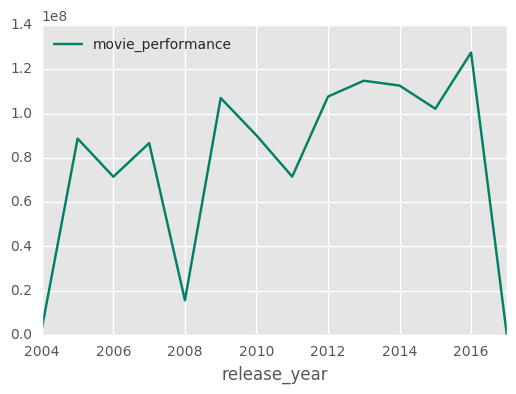

In [664]:
movie_performance_plot = full_data[["Release Date", "movie_performance"]]
movie_performance_plot = movie_performance_plot.assign(release_year = (pd.to_datetime(movie_performance_plot["Release Date"])
                                                 .dt.year.astype(int)))
movie_performance_plot = movie_performance_plot[movie_performance_plot['release_year']>2003]
# movie_performance_plot = movie_performance_plot[movie_performance_plot["ROI"]<movie_performance_plot["ROI"].quantile(0.95)]
movie_performance_plot_data = movie_performance_plot.groupby('release_year')["movie_performance"].mean().reset_index()
movie_performance_plot_data.plot(x='release_year', y='movie_performance',colormap = "summer")

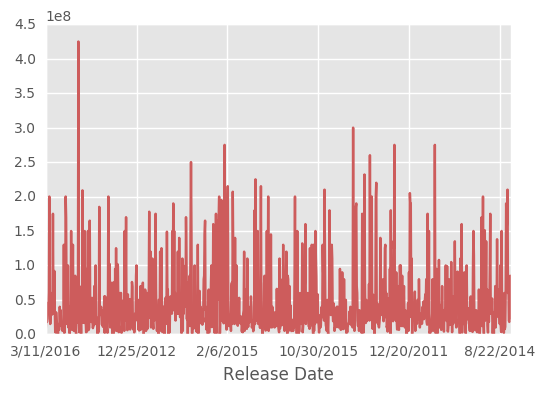

In [568]:
# budget_plot = pd.Series(full_data_all["Production Budget"].tolist(), index=full_data_all["Release Date"])
# budget_plot.plot(kind="line", color="indianred")

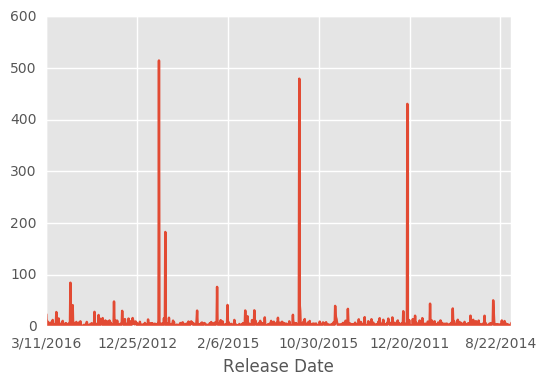

In [562]:
ROI_plot = pd.Series(full_data_all["ROI"].tolist(), index=full_data_all["Release Date"])
ROI_plot.plot(kind='line')

In [56]:
import seaborn as sns

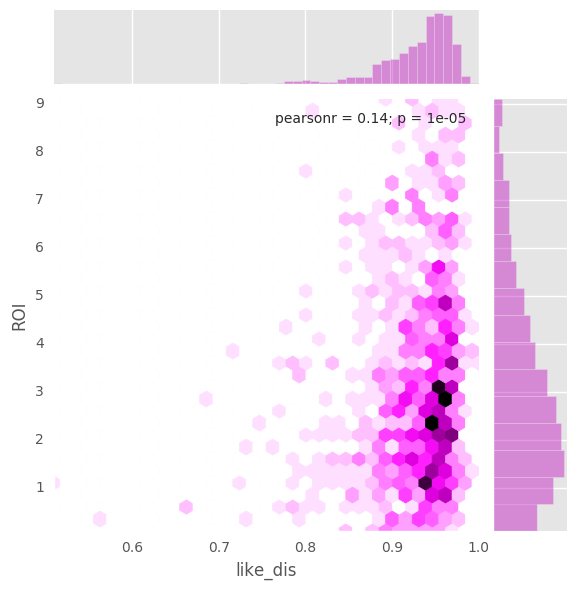

In [670]:
sns.jointplot(x=full_data_all["like_dis"][full_data_all["ROI"] < full_data_all["ROI"].quantile(0.9)],
           y=full_data_all["ROI"][full_data_all["ROI"] < full_data_all["ROI"].quantile(0.9)], kind='hex',color="m")
plt.show()

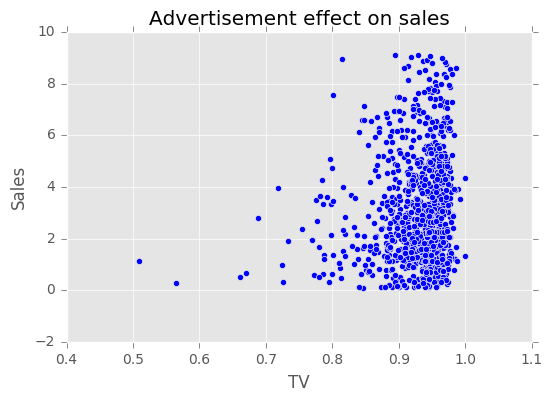

In [55]:
plt.scatter(x=full_data_all["like_dis"][full_data_all["ROI"] < full_data_all["ROI"].quantile(0.9)],
           y=full_data_all["ROI"][full_data_all["ROI"] < full_data_all["ROI"].quantile(0.9)] )
plt.plot(x=full_data_all["like_dis"][full_data_all["ROI"] < full_data_all["ROI"].quantile(0.9)],
         y=full_data_all["ROI"][full_data_all["ROI"] < full_data_all["ROI"].quantile(0.9)])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Advertisement effect on sales')
plt.show()

In [92]:
sentiment_data = pd.read_csv("C:/Users/oweni/Desktop/big data/youtube/output/comments.csv")

In [126]:
sentiment_data.head()

,comment,movie,time
0,Just me who found this movie awful?,#Horror,2017-04-06 18:03:35
1,IF YOURE AN #HORROR FAN LIKE ME ! IM MAKING A ...,#Horror,2016-08-23 10:57:55
2,this film looks terrible,#Horror,2016-08-12 10:53:12
3,it's about to be a girl fight!,#Horror,2016-06-29 18:20:46
4,if i can save 1 person from seeing this ill be...,#Horror,2016-06-18 11:07:59


In [113]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [116]:
sid = SentimentIntensityAnalyzer()
def get_sent_score(sentence, sid):
    return sid.polarity_scores(str(sentence))

def get_sent_comp(sentence, sid):
    return sid.polarity_scores(str(sentence))['compound']

In [117]:
test = sentiment_data.iloc[:200]
start = time.time()
test = test.assign(sent = test["comment"].apply(lambda x: get_sent_comp(x, sid)))
end = time.time()
end-start

0.26800012588500977

In [122]:
sentiment_data = sentiment_data.join(sentiment_data["comment"].apply(lambda x: get_sent_score(x, sid)).apply(pd.Series))

KeyboardInterrupt: 

In [556]:
sentiment_data.shape

(2979511, 3)

In [120]:
import time
start = time.time()
test = sentiment_data.iloc[:10000]
test = test.join(test["comment"].apply(lambda x: get_sent_score(x, sid)).apply(pd.Series))
end = time.time()
end-start

8.268999814987183

In [124]:
test.to_csv("test.csv",index = None)

In [102]:
start = time.time()
aa = test["comment"].apply(get_sent_score).apply(pd.Series)
end = time.time()
end-start

48.34599995613098

## clustering

## stemming, tokenize and tf-idf

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [528]:
stopwords = [str(i) for i in nltk.corpus.stopwords.words('english')]
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [537]:
stopwords.extend(["film","movie",'que', 'la', 'en', 'el', 'es', 'se', 'nt', 'ca', 'movi', 'watch', 'like', 'watch movi', 'look', 'trailer','say','xcxa',])

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [538]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    text = text.decode('ascii', 'replace').replace(u'\ufffd', '')
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        tok = re.sub(r'[^a-zA-z]+|\W|[_]', '', str(token))
        if tok not in stopwords:
            filtered_tokens.append(tok)
    stems = [stemmer.stem(t) for t in filtered_tokens if stemmer.stem(t) not in stopwords]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]+', token) and token not in stopwords:
            filtered_tokens.append(token)
    return filtered_tokens

In [554]:
test_data = sentiment_data.sample(n=100000, random_state=667,axis=0)
test_data = test_data.assign(comment = test_data['comment'].astype(str).apply(tokenize_and_stem))
# test_data.loc['comment'] = test_data['comment'].apply(lambda x: x+" ")
test_group = test_data.groupby("movie")['comment'].sum().reset_index()
test_group.columns = ['movie', 'comment']

In [555]:
keyword_list = list(set(test_group['comment'].sum()))

In [557]:
totalvocab_stemmed = sorted(keyword_list)
vocab_frame = pd.DataFrame({'words': totalvocab_stemmed})

,words
0,
1,aa
2,aaa
3,aaaa
4,aaaaa
5,aaaaaa
6,aaaaaaa
7,aaaaaaaa
8,aaaaaaaaaa
9,aaaaaaaaaaaaaaa


In [558]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(test_group['comment'].apply(lambda x:" ".join(x))) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

Wall time: 1min 20s
(1686, 4715)


In [671]:
terms = tfidf_vectorizer.get_feature_names()

In [672]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print(dist)

[[  0.00000000e+00   6.95415212e-01   9.19082452e-01 ...,   8.49287024e-01
    7.49334057e-01   7.50436308e-01]
 [  6.95415212e-01   4.44089210e-16   9.41849760e-01 ...,   8.23080208e-01
    8.27285486e-01   7.94816681e-01]
 [  9.19082452e-01   9.41849760e-01  -2.22044605e-16 ...,   9.85209062e-01
    9.76048742e-01   9.66793436e-01]
 ..., 
 [  8.49287024e-01   8.23080208e-01   9.85209062e-01 ...,   0.00000000e+00
    8.50626039e-01   7.26894858e-01]
 [  7.49334057e-01   8.27285486e-01   9.76048742e-01 ...,   8.50626039e-01
    0.00000000e+00   6.62152819e-01]
 [  7.50436308e-01   7.94816681e-01   9.66793436e-01 ...,   7.26894858e-01
    6.62152819e-01   0.00000000e+00]]


## Kmeans

In [690]:
from sklearn.cluster import KMeans

num_clusters = 11

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 3.07 s


In [674]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km, 'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [515]:
len(clusters)

1187

In [721]:
films = { 'movie': test_group['movie'], 'comment': test_group['comment'],  'cluster': clusters }

frame = pd.DataFrame(films , columns = ['movie', 'comment', 'cluster'])

In [692]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % terms[ind].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d movies:" % i, end='')
    for movie in frame[frame['cluster']==i]['movie']:
        print(' %s,' % movie, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: love, song, know, good, lol, anim,

Cluster 0 movies: 3, 3 Days to Kill, A Christmas Carol, A Monster in Paris, ABCD (Any Body Can Dance), About Last Night, Adventureland, Alice Through the Looking Glass, Alice in Wonderland, Alleluia! The Devil's Carnival, Aloha, Alone in the Dark, Amour, Arnolds Park, Arthur and the Invisibles, Astro Boy, August Rush, Bad Words, Beastly, Beyond the Black Rainbow, Beyond the Lights, Big Eyes, Big Hero 6, Big Momma's House 2, Blackthorn, Bleeding Hearts, Blood Diamond, Brave, Bright Star, Broken City, Burlesque, By the Sea, Cars 2, Case 39, Certifiably Jonathan, Cinderella Man, Clash of the Titans, Clerks II, Cloudy with a Chance of Meatballs, Come Early Morning, Corpse Bride, Crazy, Stupid, Love., Cry_Wolf, Curse of the Golden Flower, Cyrus, Da Sweet Blood of Jesus, Dark Shadows, Date Night, Deadpool, Definitely, Maybe, Despicable Me 2, Diary of a Wimpy Kid, Endless Love, Epic, Eragon, Ernest & Celestine, Every

## Multidimensional scaling

In [693]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

## Visualizing document clusters

In [700]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',5:'#bc8f8f',
                  6:"#cd5c5c",7:"#8b4513",8:"#ee82ee",9:"#cd853f",10:'#b8860b',11:"#ff69b4"}

#set up cluster names using a dict
cluster_names = {0: 'love, song, know', 
                 1: 'black, white, peopl', 
                 2: 'del, para, mi', 
                 3: 'god, christian, jesus', 
                 4: 'horror, scari, scare',
                 5: 'book, read, read book',
                 6: "lol, fuck, love",
                 7: "harri, potter, harri potter",
                 8: "good, peopl, make, ",
                 9: "der, ich, und",
                10: 'good, make, great'}

In [724]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=frame['movie'].tolist)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

KeyboardInterrupt: 

In [ ]:
plt.close()

In [709]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [749]:
import json

class Object:
    def toJSON(self):
        return json.dumps(self, default=lambda o: o.__dict__, 
            sort_keys=True, indent=4)


In [777]:
import sys
reload(sys)
sys.setdefaultencoding("ISO-8859-1")
a= frame["movie"].reset_index().to_json(orient='records')
a= a.decode('utf-8','ignore').encode("utf-8")

In [797]:
to_json(orient='records').

AttributeError: 'list' object has no attribute 'decode'

In [818]:
#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title='movie')) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 

fig, ax = plt.subplots(figsize=(14,8)) #set plot size

ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
# html = mpld3.fig_to_html(fig)
# print(html)

## Hierachical clustering

In [343]:
com = pd.read_csv("C:/Users/oweni/Desktop/sentiment_score.csv",sep='\t', error_bad_lines=False)
com_group= com.groupby("movie")['compound','neg',"neu",'pos'].mean().reset_index()
com_group.to_csv('comments_group.csv')

Skipping line 171133: expected 9 fields, saw 11

Skipping line 997779: expected 9 fields, saw 11



KeyboardInterrupt: 

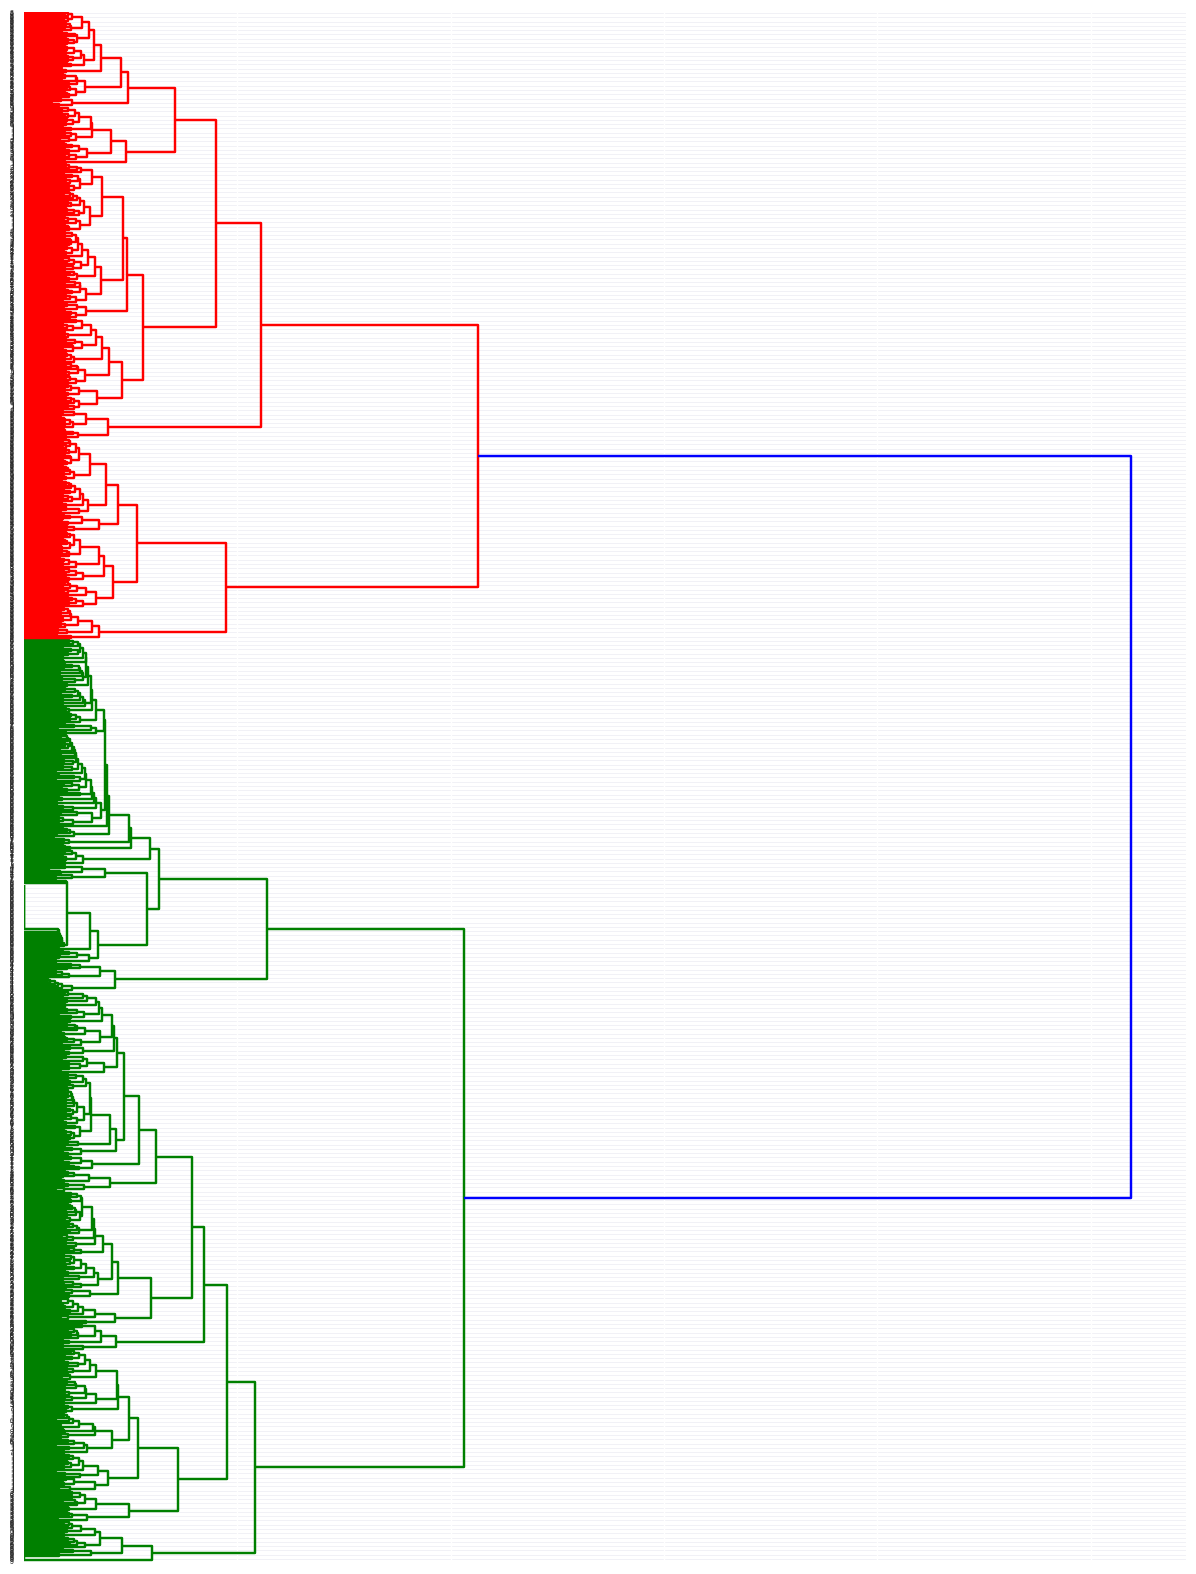

In [348]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=clusters);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.show() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

## Latent Dirichlet Allocation

In [349]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [350]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [352]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in test_group["comment"]]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

Wall time: 2.52 s
Wall time: 4.69 s
Wall time: 79 ms


In [353]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [360]:
%time lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

Wall time: 5min 48s


In [361]:
lda.show_topics()

[(0,
  u'0.004*guy + 0.004*get + 0.003*world + 0.003*would + 0.003*zu + 0.002*bless + 0.002*die + 0.002*part + 0.002*murder + 0.002*face'),
 (1,
  u"0.039*movi + 0.022*like + 0.021*'s + 0.018*n't + 0.013*look + 0.011*see + 0.011*watch + 0.011*one + 0.009*film + 0.008*good"),
 (2,
  u"0.015*la + 0.014*de + 0.011*que + 0.006*en + 0.006*'s + 0.005*el + 0.005*would + 0.005*think + 0.004*es + 0.004*esta"),
 (3,
  u"0.035*movi + 0.024*'s + 0.018*n't + 0.013*like + 0.011*watch + 0.008*get + 0.007*see + 0.007*'m + 0.007*go + 0.007*look"),
 (4,
  u'0.008*zu + 0.008*einen + 0.007*um + 0.004*da + 0.004*nu + 0.004*c + 0.003*te + 0.003*\\xe2\\x98\\x86 + 0.003*du + 0.003*ich'),
 (5,
  u"0.015*'s + 0.010*movi + 0.005*film + 0.005*say + 0.003*way + 0.003*don\\'t + 0.003*fight + 0.003*someon + 0.003*man + 0.003*agre"),
 (6,
  u"0.026*movi + 0.012*'s + 0.009*like + 0.009*n't + 0.008*look + 0.007*trailer + 0.006*watch + 0.006*good + 0.005*know + 0.005*see"),
 (7,
  u'0.012*\\xc2\\xa0 + 0.007*der + 0.007*

In [362]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

ValueError: setting an array element with a sequence